In [1]:
df=read.csv('C:\\Users\\abine\\OneDrive\\Documents\\Datasets\\titanic\\train.csv')

In [2]:
head(df)

age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no


# EDA

In [8]:
install.packages('Amelia')

Installing package into 'C:/Users/abine/OneDrive/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'Amelia' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\abine\AppData\Local\Temp\Rtmpc7K70U\downloaded_packages


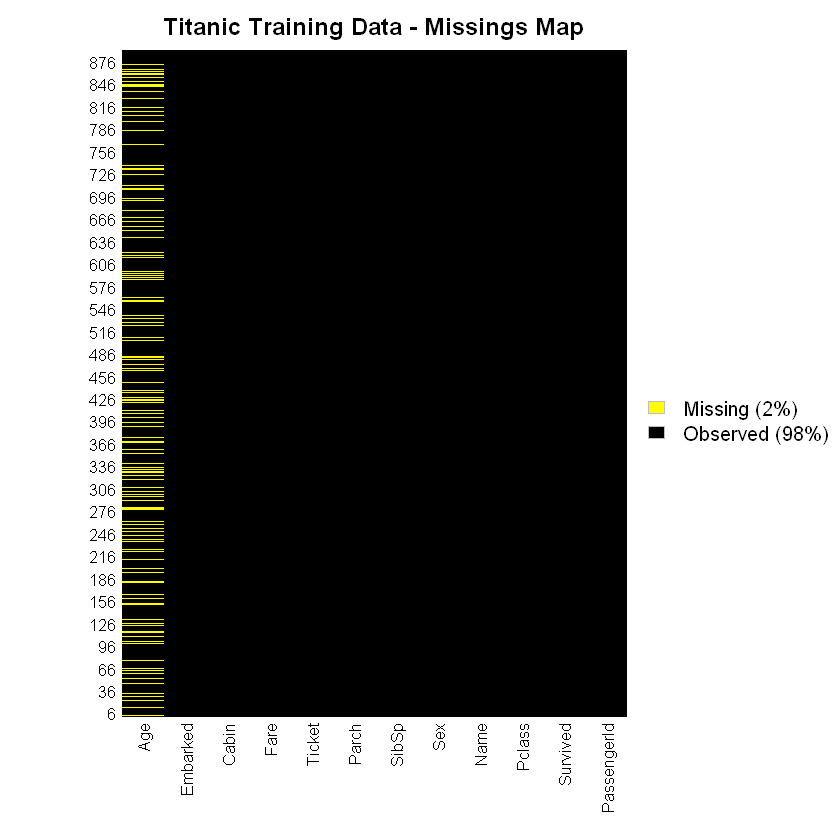

In [41]:
library('Amelia')
missmap(df,main="Titanic Training Data - Missings Map",col=c("yellow","black"),legend=TRUE)

Checking Missing values and found out that Age has lot of missing values

# Data Visualization with ggplot2

Warning message:
"package 'ggplot2' was built under R version 3.6.2"

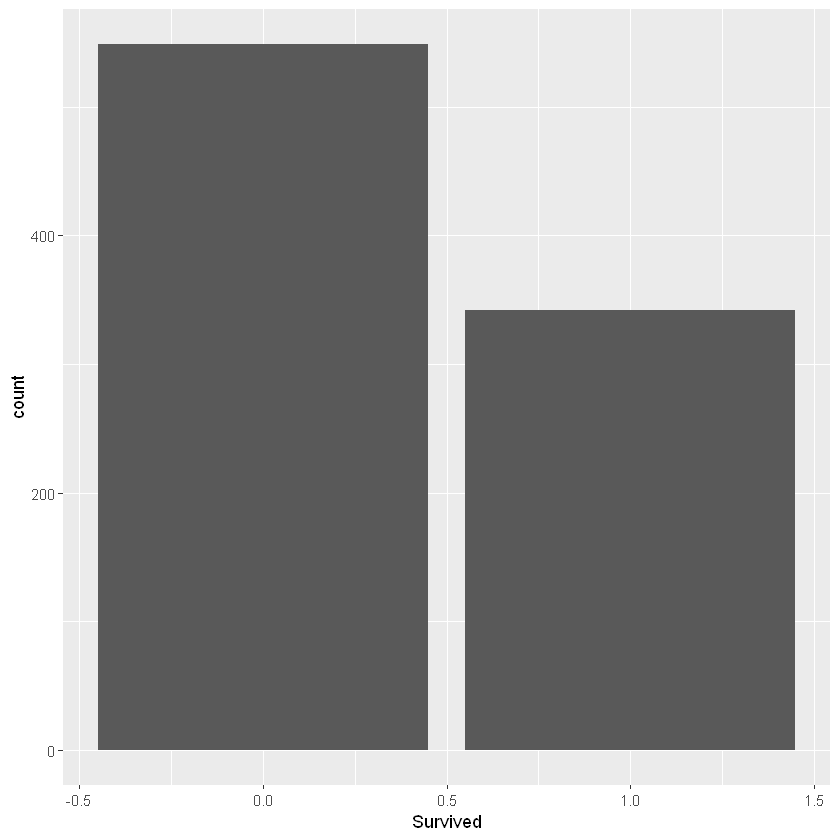

In [4]:
library(ggplot2)
ggplot(df,aes(Survived))+geom_bar()

In [ ]:
majority of travelers died

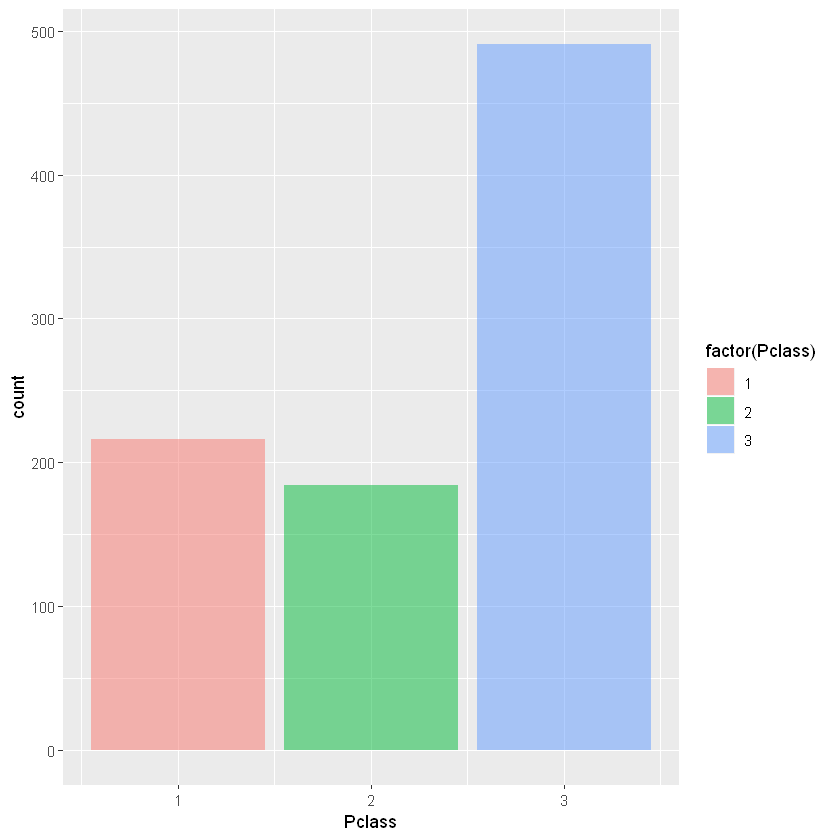

In [22]:
ggplot(df.train,aes(Pclass))+geom_bar(aes(fill=factor(Pclass)),alpha=0.5)

3rd class had more travellers

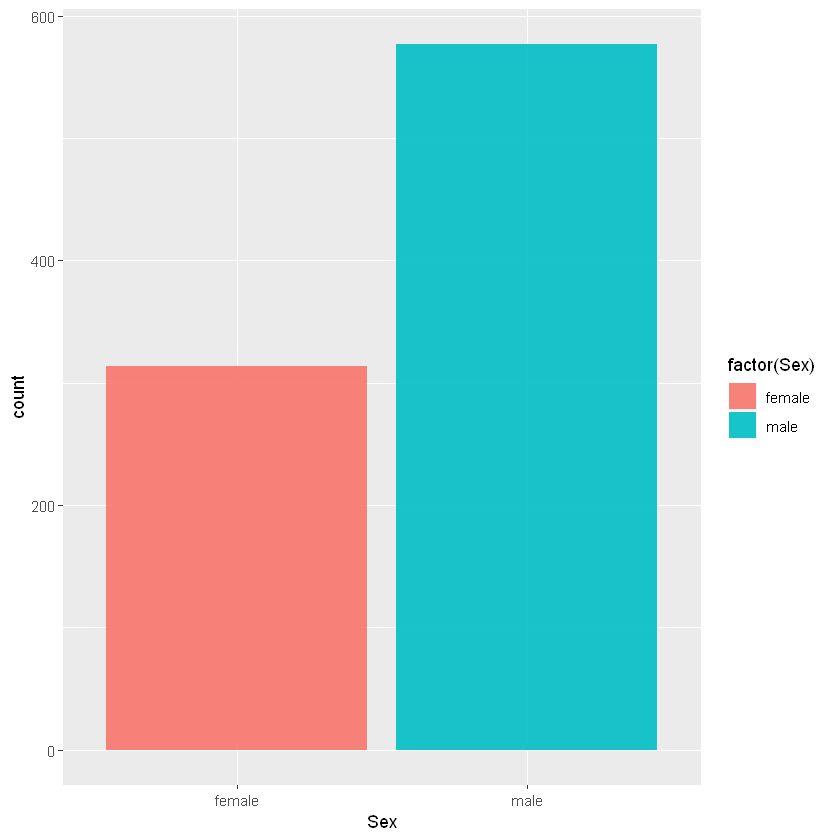

In [28]:
ggplot(df,aes(Sex))+geom_bar(aes(fill=factor(Sex)),alpha=0.9)

There where more male passengers

Warning message:
"Removed 177 rows containing non-finite values (stat_bin)."

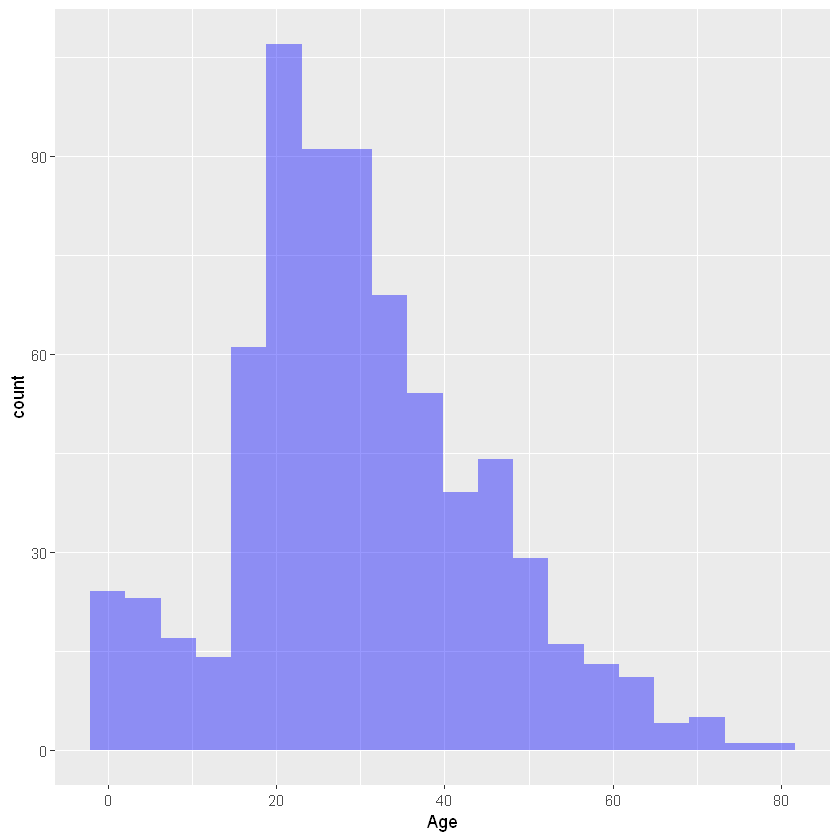

In [5]:
ggplot(df,aes(Age))+geom_histogram(fill='blue',bins=20,alpha=0.4)

Youngsters are the majority in passengers

# Cleaning

Warning message:
"Removed 177 rows containing non-finite values (stat_boxplot)."

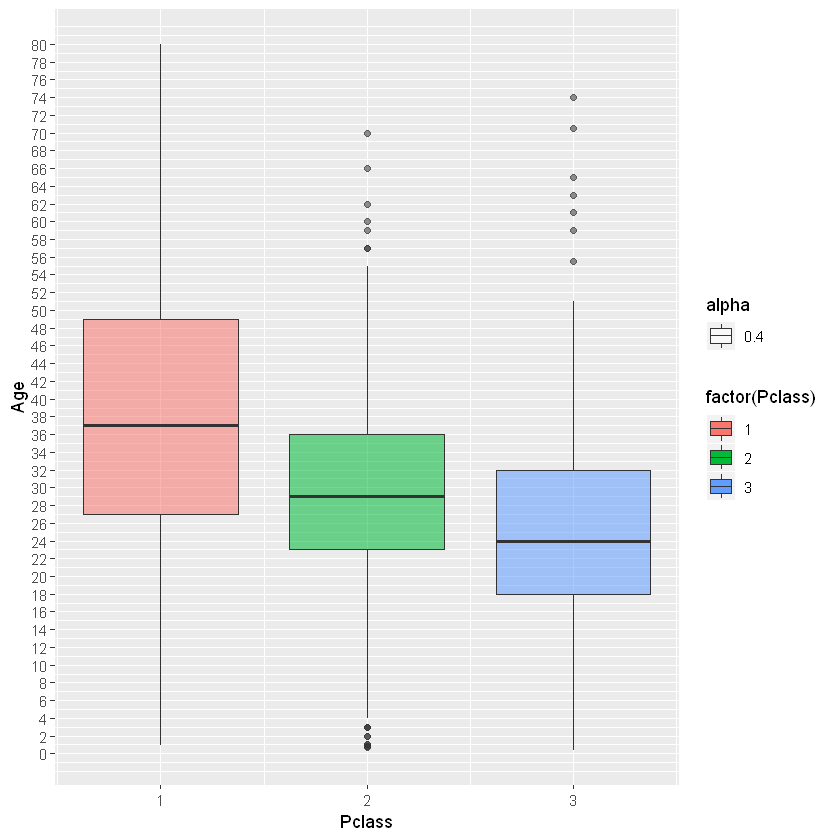

In [11]:
pl=ggplot(df,aes(Pclass,Age))+geom_boxplot(aes(group=Pclass,fill=factor(Pclass),alpha=0.4))
pl+scale_y_continuous(breaks=seq(min(0),max(80),by=2))

finding the mean of age in different classes

In [42]:
impute_age=function(age,class){
    out=age
    for (i in 1:length(age)){
        if (is.na(age[i])){
            if(class[i]==1){
                out[i]=37
            }else if (class[i]==2){
                out[i]=29
            }else{
                out[i]=24
            }
        }else{
                out[i]=age[i]
        }
    }
    return(out)
}

In [43]:
fixed.ages=impute_age(df$Age,df$Pclass)

Replacing missing values with the (mean of age) of their respective Passenger Class

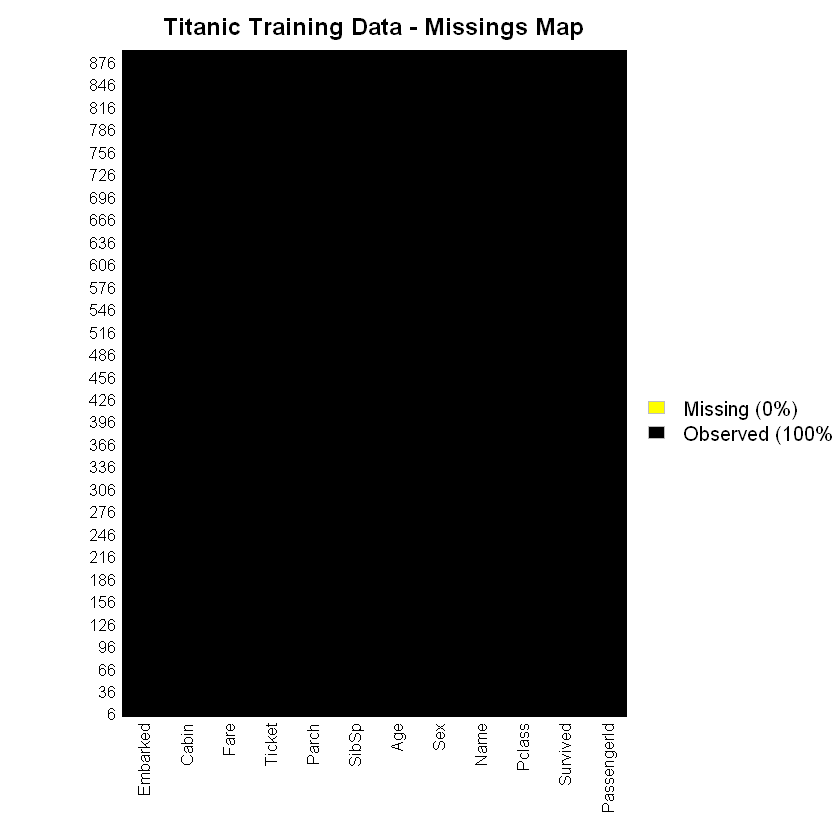

In [44]:
df$Age=fixed.ages
missmap(df,main="Titanic Training Data - Missings Map",col=c("yellow","black"),legend=TRUE)

To confirm whether the missing values are filled

# Building a Logistic Regression Model

In [45]:
str(df)

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : Factor w/ 891 levels "Abbing, Mr. Anthony",..: 109 191 358 277 16 559 520 629 417 581 ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age        : num  22 38 26 35 35 24 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : Factor w/ 681 levels "110152","110413",..: 524 597 670 50 473 276 86 396 345 133 ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : Factor w/ 148 levels "","A10","A14",..: 1 83 1 57 1 1 131 1 1 1 ...
 $ Embarked   : Factor w/ 4 levels "","C","Q","S": 4 2 4 4 4 3 4 4 4 2 ...


In [46]:
library(dplyr)
df=select(df,-PassengerId,-Name,-Ticket,-Cabin)

Removing PassengeId,Name,Ticket,Cabin because they are Identity Variables

In [49]:
head(df)

Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22,1,0,7.2500,S
1,1,female,38,1,0,71.2833,C
1,3,female,26,0,0,7.9250,S
1,1,female,35,1,0,53.1000,S
0,3,male,35,0,0,8.0500,S
0,3,male,24,0,0,8.4583,Q


In [51]:
str(df)

'data.frame':	891 obs. of  8 variables:
 $ Survived: int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass  : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Sex     : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age     : num  22 38 26 35 35 24 54 2 27 14 ...
 $ SibSp   : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch   : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Fare    : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Embarked: Factor w/ 4 levels "","C","Q","S": 4 2 4 4 4 3 4 4 4 2 ...


In [53]:
df$Survived=factor(df$Survived)
df$Pclass=factor(df$Pclass)
df$Parch=factor(df$Parch)
df$SibSp=factor(df$SibSp)

Changing Survived,Pclass,Parch,SibSp to factors because it has only few levels.
This will help in Better Classification.

In [55]:
str(df)

'data.frame':	891 obs. of  8 variables:
 $ Survived: Factor w/ 2 levels "0","1": 1 2 2 2 1 1 1 1 2 2 ...
 $ Pclass  : Factor w/ 3 levels "1","2","3": 3 1 3 1 3 3 1 3 3 2 ...
 $ Sex     : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age     : num  22 38 26 35 35 24 54 2 27 14 ...
 $ SibSp   : Factor w/ 7 levels "0","1","2","3",..: 2 2 1 2 1 1 1 4 1 2 ...
 $ Parch   : Factor w/ 7 levels "0","1","2","3",..: 1 1 1 1 1 1 1 2 3 1 ...
 $ Fare    : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Embarked: Factor w/ 4 levels "","C","Q","S": 4 2 4 4 4 3 4 4 4 2 ...


# Train the Model

In [58]:
library(caTools)
set.seed(101)

split=sample.split(df$Survived, SplitRatio=0.70)

final.train=subset(df,split==TRUE)
final.test=subset(df,split==FALSE)

In [61]:
final.log.model=glm(formula=Survived~.,family=binomial(link='logit'),data=final.train)
summary(final.log.model)


Call:
glm(formula = Survived ~ ., family = binomial(link = "logit"), 
    data = final.train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.8288  -0.5607  -0.4096   0.6174   2.4898  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  1.777e+01  2.400e+03   0.007 0.994091    
Pclass2     -1.230e+00  3.814e-01  -3.225 0.001261 ** 
Pclass3     -2.160e+00  3.841e-01  -5.624 1.87e-08 ***
Sexmale     -2.660e+00  2.467e-01 -10.782  < 2e-16 ***
Age         -3.831e-02  1.034e-02  -3.705 0.000212 ***
SibSp1      -2.114e-02  2.755e-01  -0.077 0.938836    
SibSp2      -4.000e-01  6.463e-01  -0.619 0.536028    
SibSp3      -2.324e+00  8.994e-01  -2.584 0.009765 ** 
SibSp4      -1.196e+00  8.302e-01  -1.440 0.149839    
SibSp5      -1.603e+01  9.592e+02  -0.017 0.986666    
SibSp8      -1.633e+01  1.004e+03  -0.016 0.987019    
Parch1       7.290e-01  3.545e-01   2.056 0.039771 *  
Parch2       1.406e-01  4.504e-01   0.312 0.754892    
Parch3

Training the data with logistic regression and taking its summary

In [63]:
fitted.probabilities=predict(final.log.model,newdata=final.test,type='response')

In [65]:
fitted.results=ifelse(fitted.probabilities > 0.5,1,0)

In [69]:
misClasificError=mean(fitted.results!=final.test$Survived)
print(paste('Accuracy',1-misClasificError))

[1] "Accuracy 0.798507462686567"


In [75]:
table(final.test$Survived,fitted.probabilities>0.8)

   
    FALSE TRUE
  0   163    2
  1    60   43

CONFUSION MATRIX
TN=163 | FP=2  |
FN=60  | TP=43 |

163-Dead predicted correctly
2-Dead predicted Incorrectly
60-Survived predicted Incorrectly
43-Survived predicted correctly

In [73]:
#SAME THING: table(final.test$Survived,fitted.results)

   fitted.results
      0   1
  0 140  25
  1  29  74